### Initial Setup

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-dce2afe3-5558-5395-f573-b0c0b2810275)


In [2]:
!git clone "https://github.com/akshatjaipuria/ComputerVision101.git"

Cloning into 'ComputerVision101'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 174 (delta 59), reused 139 (delta 34), pack-reused 0
Receiving objects: 100% (174/174), 2.36 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [3]:
%cd '/content/ComputerVision101/AdvancedConcepts'

/content/ComputerVision101/AdvancedConcepts


### Dataloaders

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import albumentations as alb
from albumentations.pytorch import ToTensorV2
import numpy as np

In [5]:
device = torch.device ("cuda:0" if torch.cuda.is_available () else "cpu")
print (f"Device: {device}")

Device: cuda:0


In [6]:
# Mean and STD for CIFAR-10
mean = (0.4914, 0.48216, 0.44653)
std = (0.24703, 0.24349, 0.26159)

In [7]:
class train_transforms:
    def __init__(self):
        self.train_transform = alb.Compose([
            alb.Resize(32, 32, 3),
            alb.HorizontalFlip(),
            alb.ShiftScaleRotate(),
            alb.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16, fill_value=[i * 2555 for i in mean], mask_fill_value=None),
            alb.Normalize(mean=mean, std=std),
            ToTensorV2(),
        ])

    def __call__(self, img):
        img = np.array(img)
        img = self.train_transform(image=img)['image']
        return img


class test_transforms:
    def __init__(self):
        self.test_transform = alb.Compose([
            alb.Resize(32, 32, 3),
            alb.Normalize(mean=mean, std=std),
            ToTensorV2(),
        ])

    def __call__(self, img):
        img = np.array(img)
        img = self.test_transform(image=img)['image']
        return img

In [8]:
from data_loader.data_loader import GetDataLoaders

train_loader, test_loader = GetDataLoaders(torchvision.datasets.CIFAR10, train_transforms(), test_transforms(), 512)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


In [9]:
from visualizer.visualizer import DisplayData

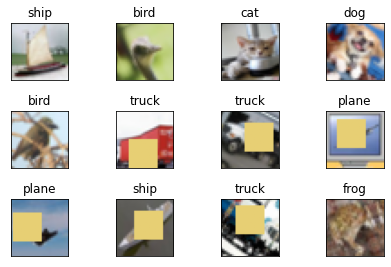

In [10]:
DisplayData (train_loader, classes, [mean, std])

In [11]:
from model.network import Network, PrintSummary

In [13]:
net = Network()
net.to(device)
PrintSummary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

In [14]:
from model.trainer import TrainModel

In [15]:
data_dict = TrainModel(net, train_loader, test_loader, nn.CrossEntropyLoss, False, 30, 0.01, device)

-------------- Epoch 1 --------------


Train: Loss=1.6524 Batch_id=97 Accuracy=30.82: 100%|██████████| 98/98 [00:15<00:00,  6.49it/s]


Test set: Average loss: 1.6097, Accuracy: 4191/10000 (41.91%)

-------------- Epoch 2 --------------


Train: Loss=1.5067 Batch_id=97 Accuracy=44.78: 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]


Test set: Average loss: 1.3649, Accuracy: 5009/10000 (50.09%)

-------------- Epoch 3 --------------


Train: Loss=1.3529 Batch_id=97 Accuracy=50.38: 100%|██████████| 98/98 [00:14<00:00,  6.64it/s]


Test set: Average loss: 1.2274, Accuracy: 5677/10000 (56.77%)

-------------- Epoch 4 --------------


Train: Loss=1.2803 Batch_id=97 Accuracy=53.92: 100%|██████████| 98/98 [00:14<00:00,  6.72it/s]


Test set: Average loss: 1.0805, Accuracy: 6144/10000 (61.44%)

-------------- Epoch 5 --------------


Train: Loss=1.1644 Batch_id=97 Accuracy=56.50: 100%|██████████| 98/98 [00:14<00:00,  6.58it/s]


Test set: Average loss: 1.0745, Accuracy: 6182/10000 (61.82%)

-------------- Epoch 6 --------------


Train: Loss=1.1771 Batch_id=97 Accuracy=58.82: 100%|██████████| 98/98 [00:14<00:00,  6.68it/s]


Test set: Average loss: 1.1155, Accuracy: 6092/10000 (60.92%)

-------------- Epoch 7 --------------


Train: Loss=1.1194 Batch_id=97 Accuracy=60.58: 100%|██████████| 98/98 [00:14<00:00,  6.68it/s]


Test set: Average loss: 0.9570, Accuracy: 6650/10000 (66.50%)

-------------- Epoch 8 --------------


Train: Loss=1.0987 Batch_id=97 Accuracy=62.00: 100%|██████████| 98/98 [00:14<00:00,  6.70it/s]


Test set: Average loss: 0.8840, Accuracy: 6930/10000 (69.30%)

-------------- Epoch 9 --------------


Train: Loss=1.0433 Batch_id=97 Accuracy=63.30: 100%|██████████| 98/98 [00:14<00:00,  6.80it/s]


Test set: Average loss: 0.8358, Accuracy: 7086/10000 (70.86%)

-------------- Epoch 10 --------------


Train: Loss=1.0815 Batch_id=97 Accuracy=64.58: 100%|██████████| 98/98 [00:14<00:00,  6.65it/s]


Test set: Average loss: 0.8425, Accuracy: 7050/10000 (70.50%)

-------------- Epoch 11 --------------


Train: Loss=0.9543 Batch_id=97 Accuracy=65.59: 100%|██████████| 98/98 [00:14<00:00,  6.75it/s]


Test set: Average loss: 0.8163, Accuracy: 7188/10000 (71.88%)

-------------- Epoch 12 --------------


Train: Loss=0.8731 Batch_id=97 Accuracy=66.80: 100%|██████████| 98/98 [00:14<00:00,  6.69it/s]


Test set: Average loss: 0.7906, Accuracy: 7258/10000 (72.58%)

-------------- Epoch 13 --------------


Train: Loss=0.8968 Batch_id=97 Accuracy=67.33: 100%|██████████| 98/98 [00:14<00:00,  6.72it/s]


Test set: Average loss: 0.7317, Accuracy: 7446/10000 (74.46%)

-------------- Epoch 14 --------------


Train: Loss=0.9538 Batch_id=97 Accuracy=68.20: 100%|██████████| 98/98 [00:14<00:00,  6.60it/s]


Test set: Average loss: 0.7222, Accuracy: 7513/10000 (75.13%)

-------------- Epoch 15 --------------


Train: Loss=0.8777 Batch_id=97 Accuracy=68.78: 100%|██████████| 98/98 [00:14<00:00,  6.72it/s]


Test set: Average loss: 0.7024, Accuracy: 7581/10000 (75.81%)

-------------- Epoch 16 --------------


Train: Loss=0.8136 Batch_id=97 Accuracy=69.36: 100%|██████████| 98/98 [00:14<00:00,  6.71it/s]


Test set: Average loss: 0.7000, Accuracy: 7581/10000 (75.81%)

-------------- Epoch 17 --------------


Train: Loss=0.7929 Batch_id=97 Accuracy=69.87: 100%|██████████| 98/98 [00:14<00:00,  6.64it/s]


Test set: Average loss: 0.6937, Accuracy: 7630/10000 (76.30%)

-------------- Epoch 18 --------------


Train: Loss=0.9524 Batch_id=97 Accuracy=70.45: 100%|██████████| 98/98 [00:14<00:00,  6.65it/s]


Test set: Average loss: 0.7081, Accuracy: 7562/10000 (75.62%)

-------------- Epoch 19 --------------


Train: Loss=0.7545 Batch_id=97 Accuracy=70.66: 100%|██████████| 98/98 [00:14<00:00,  6.71it/s]


Test set: Average loss: 0.6564, Accuracy: 7720/10000 (77.20%)

-------------- Epoch 20 --------------


Train: Loss=0.8412 Batch_id=97 Accuracy=71.40: 100%|██████████| 98/98 [00:14<00:00,  6.75it/s]


Test set: Average loss: 0.6641, Accuracy: 7742/10000 (77.42%)

-------------- Epoch 21 --------------


Train: Loss=0.8194 Batch_id=97 Accuracy=72.00: 100%|██████████| 98/98 [00:14<00:00,  6.78it/s]


Test set: Average loss: 0.6437, Accuracy: 7796/10000 (77.96%)

-------------- Epoch 22 --------------


Train: Loss=0.8192 Batch_id=97 Accuracy=72.19: 100%|██████████| 98/98 [00:14<00:00,  6.73it/s]


Test set: Average loss: 0.6488, Accuracy: 7750/10000 (77.50%)

-------------- Epoch 23 --------------


Train: Loss=0.8186 Batch_id=97 Accuracy=72.68: 100%|██████████| 98/98 [00:14<00:00,  6.88it/s]


Test set: Average loss: 0.6309, Accuracy: 7803/10000 (78.03%)

-------------- Epoch 24 --------------


Train: Loss=0.8158 Batch_id=97 Accuracy=72.96: 100%|██████████| 98/98 [00:14<00:00,  6.73it/s]


Test set: Average loss: 0.6311, Accuracy: 7816/10000 (78.16%)

-------------- Epoch 25 --------------


Train: Loss=0.7440 Batch_id=97 Accuracy=73.27: 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]


Test set: Average loss: 0.6112, Accuracy: 7885/10000 (78.85%)

-------------- Epoch 26 --------------


Train: Loss=0.7590 Batch_id=97 Accuracy=73.61: 100%|██████████| 98/98 [00:14<00:00,  6.81it/s]


Test set: Average loss: 0.6038, Accuracy: 7915/10000 (79.15%)

-------------- Epoch 27 --------------


Train: Loss=0.8299 Batch_id=97 Accuracy=73.94: 100%|██████████| 98/98 [00:14<00:00,  6.84it/s]


Test set: Average loss: 0.6219, Accuracy: 7900/10000 (79.00%)

-------------- Epoch 28 --------------


Train: Loss=0.8606 Batch_id=97 Accuracy=74.39: 100%|██████████| 98/98 [00:14<00:00,  6.77it/s]


Test set: Average loss: 0.5933, Accuracy: 7996/10000 (79.96%)

-------------- Epoch 29 --------------


Train: Loss=0.7322 Batch_id=97 Accuracy=74.73: 100%|██████████| 98/98 [00:14<00:00,  6.63it/s]


Test set: Average loss: 0.5810, Accuracy: 8034/10000 (80.34%)

-------------- Epoch 30 --------------


Train: Loss=0.7478 Batch_id=97 Accuracy=74.67: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]


Test set: Average loss: 0.5745, Accuracy: 8022/10000 (80.22%)



In [23]:
data_dict_2 = TrainModel(net, train_loader, test_loader, nn.CrossEntropyLoss, False, 10, 0.001, device)

-------------- Epoch 1 --------------


Train: Loss=0.6634 Batch_id=97 Accuracy=76.79: 100%|██████████| 98/98 [00:14<00:00,  6.67it/s]


Test set: Average loss: 0.5247, Accuracy: 8225/10000 (82.25%)

-------------- Epoch 2 --------------


Train: Loss=0.6767 Batch_id=97 Accuracy=76.74: 100%|██████████| 98/98 [00:14<00:00,  6.94it/s]


Test set: Average loss: 0.5279, Accuracy: 8227/10000 (82.27%)

-------------- Epoch 3 --------------


Train: Loss=0.6517 Batch_id=97 Accuracy=77.03: 100%|██████████| 98/98 [00:13<00:00,  7.08it/s]


Test set: Average loss: 0.5200, Accuracy: 8258/10000 (82.58%)

-------------- Epoch 4 --------------


Train: Loss=0.6372 Batch_id=97 Accuracy=77.39: 100%|██████████| 98/98 [00:14<00:00,  6.83it/s]


Test set: Average loss: 0.5173, Accuracy: 8266/10000 (82.66%)

-------------- Epoch 5 --------------


Train: Loss=0.6526 Batch_id=97 Accuracy=77.42: 100%|██████████| 98/98 [00:14<00:00,  6.79it/s]


Test set: Average loss: 0.5144, Accuracy: 8264/10000 (82.64%)

-------------- Epoch 6 --------------


Train: Loss=0.5683 Batch_id=97 Accuracy=77.11: 100%|██████████| 98/98 [00:14<00:00,  6.74it/s]


Test set: Average loss: 0.5128, Accuracy: 8268/10000 (82.68%)

-------------- Epoch 7 --------------


Train: Loss=0.6726 Batch_id=97 Accuracy=77.48: 100%|██████████| 98/98 [00:14<00:00,  6.84it/s]


Test set: Average loss: 0.5111, Accuracy: 8270/10000 (82.70%)

-------------- Epoch 8 --------------


Train: Loss=0.6091 Batch_id=97 Accuracy=77.60: 100%|██████████| 98/98 [00:14<00:00,  6.83it/s]


Test set: Average loss: 0.5097, Accuracy: 8273/10000 (82.73%)

-------------- Epoch 9 --------------


Train: Loss=0.6466 Batch_id=97 Accuracy=77.37: 100%|██████████| 98/98 [00:13<00:00,  7.03it/s]


Test set: Average loss: 0.5111, Accuracy: 8265/10000 (82.65%)

-------------- Epoch 10 --------------


Train: Loss=0.6370 Batch_id=97 Accuracy=78.07: 100%|██████████| 98/98 [00:14<00:00,  6.97it/s]


Test set: Average loss: 0.5111, Accuracy: 8255/10000 (82.55%)



In [29]:
def Merge(pDict1, pDict2):
    dict_ = {}
    for i in pDict1.keys():
        if type(pDict1[i]) is dict:
            dict_[i] = Merge(pDict1[i], pDict2[i])
        else:
            dict_[i] = pDict1[i] + pDict2[i]
    return dict_

In [30]:
data_dict_merged = Merge (data_dict, data_dict_2)

### Misclassified images (from Test set)

In [16]:
from visualizer.visualizer import DisplayIncorrectPredictions

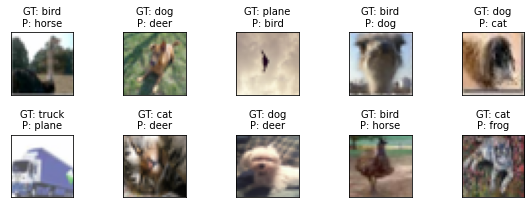

In [31]:
DisplayIncorrectPredictions (data_dict_merged['incorrect_pred'], classes, [mean, std])

### Loss/Accuracy graphs

In [19]:
from visualizer.visualizer import PlotTrainVsTest

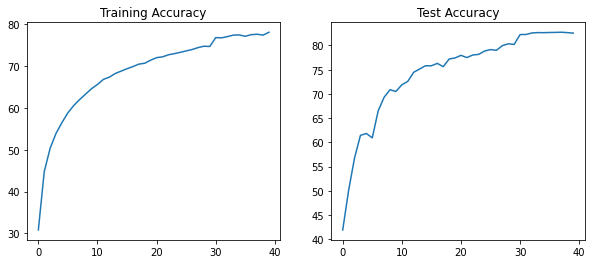

In [32]:
# Accuracy curves
PlotTrainVsTest (("Training Accuracy", data_dict_merged['train_acc']), ("Test Accuracy", data_dict_merged['test_acc']))

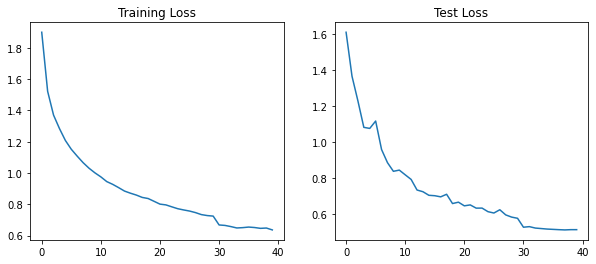

In [33]:
# Loss curves
PlotTrainVsTest (("Training Loss", data_dict_merged['train_loss']), ("Test Loss", data_dict_merged['test_loss']))